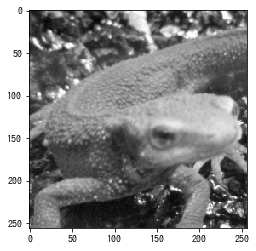

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("imori_256x256.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')
plt.show()

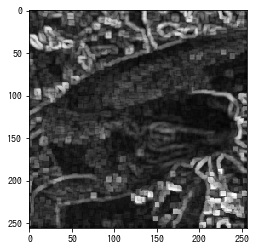

In [17]:
def filter_max_min(img, k_size=(5, 5)):
    _img = img.copy().astype(np.float32)
    k_size_h, k_size_w = k_size

    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = k_size_h, k_size_h
    pad_left, pad_right = k_size_w, k_size_w
    
    if len(_img.shape) == 2:
        _img = np.expand_dims(_img, axis=-1)

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)

    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering 
    for iy in range(new_h - k_size_h):
        for ix in range(new_w - k_size_w):
            for ic in range(c):
                out[iy, ix, ic] = _img[iy: iy + k_size_h, ix: ix + k_size_w, ic].max() - _img[iy: iy + k_size_h, ix: ix + k_size_w, ic].min()

    out = out[pad_top: pad_top + h, pad_left: pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_mm = filter_max_min(img_gray, (5, 5))
plt.imshow(img_mm[..., 0], 'gray')
plt.show()

In [4]:
img.shape

(256, 256, 3)